In [ ]:
import pandas as pd
from google.colab import files # Import files module
import os # Import os module to check for file existence

# Define the paths to the CSV files
file_paths = [
    '/content/api_data_aadhar_enrolment_0_500000.csv',
    '/content/api_data_aadhar_enrolment_500000_1000000.csv',
    '/content/api_data_aadhar_enrolment_1000000_1006029.csv'
]

# Check if any of the files are missing
missing_files = []
for path in file_paths:
    if not os.path.exists(path):
        missing_files.append(path)

# If files are missing, prompt the user to upload them
if missing_files:
    print("One or more required CSV files were not found. Please upload them:")
    for f_path in missing_files:
        print(f"- {os.path.basename(f_path)}") # Print just the filename
    print("A file upload dialog will appear. Please select the missing files.")
    uploaded = files.upload() # This will prompt the user to upload files

df_list = []

# Attempt to read the CSV files again after ensuring they are uploaded
for file in file_paths:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
    except FileNotFoundError:
        print(f"Warning: Could not read {file}. Please ensure the correct file was uploaded and named properly.")
        # Continue to the next file if one is not found, or choose to stop execution.

# Concatenate DataFrames only if there are any successfully loaded
if df_list:
    df_aadhar = pd.concat(df_list, ignore_index=True)

    print("Combined DataFrame created successfully.")
    print(f"Shape of the combined DataFrame: {df_aadhar.shape}")
    df_aadhar.head()
else:
    print("No DataFrames were loaded successfully. `df_aadhar` was not created.")

One or more required CSV files were not found. Please upload them:
- api_data_aadhar_enrolment_0_500000.csv
- api_data_aadhar_enrolment_500000_1000000.csv
- api_data_aadhar_enrolment_1000000_1006029.csv
A file upload dialog will appear. Please select the missing files.


Saving api_data_aadhar_enrolment_0_500000.csv to api_data_aadhar_enrolment_0_500000.csv
Saving api_data_aadhar_enrolment_500000_1000000.csv to api_data_aadhar_enrolment_500000_1000000.csv
Saving api_data_aadhar_enrolment_1000000_1006029.csv to api_data_aadhar_enrolment_1000000_1006029.csv
Combined DataFrame created successfully.
Shape of the combined DataFrame: (1006029, 7)


In [ ]:
print("First 5 rows of the combined DataFrame (df_aadhar):")
print(df_aadhar.head())

print("\nConcise summary of df_aadhar:")
df_aadhar.info()

print("\nData types of all columns in df_aadhar:")
print(df_aadhar.dtypes)

print("\nNumber of unique values for each column in df_aadhar:")
print(df_aadhar.nunique())

First 5 rows of the combined DataFrame (df_aadhar):
         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  

Concise summary of df_aadhar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non

## Data Cleaning and Preprocessing

### Subtask:
Address common data quality issues. This involves identifying and handling missing values (e.g., imputation or removal), correcting inconsistent data entries, and converting data types as necessary (e.g., converting date columns to datetime objects, numerical columns to appropriate types). Detail all cleaning and preprocessing steps applied.


In [ ]:
print("Checking for missing values:")
print(df_aadhar.isnull().sum())

Checking for missing values:
date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64


In [ ]:
df_aadhar['date'] = pd.to_datetime(df_aadhar['date'], format='%d-%m-%Y')
print("Data type of 'date' column after conversion:")
print(df_aadhar['date'].dtype)
print("First 5 entries of 'date' column after conversion:")
print(df_aadhar['date'].head())

Data type of 'date' column after conversion:
datetime64[ns]
First 5 entries of 'date' column after conversion:
0   2025-03-02
1   2025-03-09
2   2025-03-09
3   2025-03-09
4   2025-03-09
Name: date, dtype: datetime64[ns]


In [ ]:
print("Unique values in 'state' column before cleaning:")
print(df_aadhar['state'].unique())

Unique values in 'state' column before cleaning:
['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu and Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Jammu And Kashmir'
 'Dadra and Nagar Haveli and Daman and Diu' 'Ladakh'
 'Andaman and Nicobar Islands' 'Orissa' 'Pondicherry' 'Puducherry'
 'Lakshadweep' 'Andaman & Nicobar Islands' 'Dadra & Nagar Haveli'
 'Dadra and Nagar Haveli' 'Daman and Diu' 'WEST BENGAL' 'Jammu & Kashmir'
 'West  Bengal' '100000' 'Daman & Diu' 'West Bangal' 'Westbengal'
 'West bengal' 'andhra pradesh' 'ODISHA' 'WESTBENGAL']


In [ ]:
df_aadhar['state'] = df_aadhar['state'].str.strip().str.title()

state_mapping = {
    'Jammu And Kashmir': 'Jammu and Kashmir',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Orissa': 'Odisha',
    'Pondicherry': 'Puducherry',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'Andhra Pradesh': 'Andhra Pradesh', # Ensure consistent casing for this one too
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu', # Catching another variant
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands'
}

df_aadhar['state'] = df_aadhar['state'].replace(state_mapping)

# Handle the erroneous '100000' entry. Convert to string first to ensure replacement works, then to pd.NA
df_aadhar['state'] = df_aadhar['state'].replace('100000', pd.NA)

print("Unique values in 'state' column after cleaning:")
print(df_aadhar['state'].unique())
print(f"Number of unique states after cleaning: {df_aadhar['state'].nunique()}")

Unique values in 'state' column after cleaning:
['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu and Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'Dadra and Nagar Haveli and Daman and Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Dadra And Nagar Haveli And Daman And Diu'
 'Ladakh' 'Andaman And Nicobar Islands' 'Puducherry' 'Lakshadweep'
 'Andaman and Nicobar Islands' <NA> 'Daman & Diu']
Number of unique states after cleaning: 39


In [ ]:
print("Unique values in 'district' column before cleaning:")
print(df_aadhar['district'].unique())

Unique values in 'district' column before cleaning:
['East Khasi Hills' 'Bengaluru Urban' 'Kanpur Nagar' 'Aligarh' 'Sitamarhi'
 'Bahraich' 'Firozabad' 'Purbi Champaran' 'Maharajganj' 'Aurangabad'
 'Ghaziabad' 'Faridabad' 'Madhubani' 'Sikar' 'Bhagalpur' 'Amritsar'
 'Gurugram' 'Gautam Buddha Nagar' 'West Delhi' 'Bhind' 'Gwalior' 'Katni'
 'Coochbehar' 'Lucknow' 'Dinajpur Uttar' 'Marigaon' 'Kokrajhar' 'Agra'
 'Haridwar' 'Nagaon' 'Parbhani' 'West Khasi Hills' 'North West Delhi'
 'West Jaintia Hills' 'Unnao' 'Saharanpur' 'Dibrugarh' 'Udalguri'
 'Chirang' 'Kamrup' 'Dhubri' 'Jaunpur' 'Thane' 'Dhemaji' 'Banas Kantha'
 'Tinsukia' 'Spsr Nellore' 'Barpeta' 'Sonitpur' 'Baksa' 'Ludhiana' 'Patan'
 'Kanchipuram' 'Patna' 'Lakhimpur' 'Bongaigaon' 'Vadodara' 'Nainital'
 'Dehradun' 'Hojai' 'Dohad' 'Morbi' 'Raipur' 'Gorakhpur' 'Bulandshahr'
 'Mathura' 'Pashchim Champaran' 'Bijapur' 'Deoghar' 'Muzaffarpur' 'Banda'
 'Kachchh' 'Ri Bhoi' 'Darrang' 'Ashok Nagar' 'Darjeeling'
 'North Cachar Hills' 'Ranchi' 'Sura

In [ ]:
df_aadhar['district'] = df_aadhar['district'].str.strip().str.title().str.replace('\s+\*$', '', regex=True).str.replace('\s+-\s+', '-', regex=True).str.replace('\u2013', '-', regex=False).str.replace('\u2212', '-', regex=False).str.replace('\xa0', '', regex=False).str.replace('?', '', regex=False)

district_mapping = {
    'Bengaluru Urban': 'Bengaluru',
    'Bengaluru Rural': 'Bengaluru',
    'Bangalore Rural': 'Bengaluru',
    'Bangalore': 'Bengaluru',
    'Mysuru': 'Mysore',
    'Kancheepuram': 'Kanchipuram',
    'Gurgaon': 'Gurugram',
    'Ahmadabad': 'Ahmedabad',
    'Ahmadnagar': 'Ahmednagar',
    'Mahabub Nagar': 'Mahbubnagar',
    'K.V.Rangareddy': 'Ranga Reddy',
    'K.v. Rangareddy': 'Ranga Reddy',
    'Rangareddi': 'Ranga Reddy',
    'Warangal Urban': 'Warangal',
    'Warangal Rural': 'Warangal',
    'Warangal (Urban)': 'Warangal',
    'Allahabad': 'Prayagraj',
    'Faizabad': 'Ayodhya',
    '24 Paraganas North': 'North 24 Parganas',
    'South 24 Parganas': 'South 24 Parganas',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'South 24 Pargana': 'South 24 Parganas',
    'South 24 parganas': 'South 24 Parganas',
    'Uttar Dinajpur': 'Dakshin Dinajpur', # This might need further review if it's truly an alias or different district
    'Dinajpur Uttar': 'Dakshin Dinajpur', # Assuming 'Dinajpur Uttar' is a variant of 'Uttar Dinajpur' which itself might be Dakshin Dinajpur or a specific part.
    'Dinajpur Dakshin': 'Dakshin Dinajpur',
    'Purbi Champaran': 'East Champaran',
    'Pashchim Champaran': 'West Champaran',
    'Hazaribag': 'Hazaribagh',
    'Palamu': 'Palamau',
    'Seraikela-Kharsawan': 'Seraikela-Kharsawan',
    'Seraikela-kharsawan': 'Seraikela-Kharsawan',
    'Ballari': 'Bellary',
    'Belagavi': 'Belgaum',
    'Chamarajanagar': 'Chamrajanagar',
    'Chamarajanagar *': 'Chamrajanagar',
    'Chickmagalur': 'Chikkamagaluru',
    'Chikkaballapur': 'Chikkaballapur',
    'Chikmagalur': 'Chikkamagaluru',
    'Davanagere': 'Davangere',
    'Gadag *': 'Gadag',
    'Mysore': 'Mysuru', # Standardizing to Mysuru
    'Shimoga': 'Shivamogga',
    'Tumakuru': 'Tumkur',
    'Uttara Kannada': 'Uttar Kannada',
    'Vijayanagara': 'Vijayanagar',
    'Kasaragod': 'Kasargod',
    'Agar Malwa': 'Agar Malwa',
    'Narmadapuram': 'Narmadapuram',
    'Narsimhapur': 'Narsinghpur',
    'West Nimar': 'Khargone', # West Nimar is a region, Khargone is the district
    'Buldana': 'Buldhana',
    'Chhatrapati Sambhajinagar': 'Chhatrapati Sambhajinagar',
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Gondiya': 'Gondia',
    'Gondiya *': 'Gondia',
    'Mumbai City': 'Mumbai Suburban',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Pondicherry': 'Puducherry',
    'Sri Muktsar Sahib': 'Muktsar',
    'Shaheed Bhagat Singh Nagar': 'Shahid Bhagat Singh Nagar',
    'Chittaurgarh': 'Chittorgarh',
    'Jhunjhunun': 'Jhunjhunu',
    'Ganganagar': 'Sri Ganganagar',
    'The Nilgiris': 'Nilgiris',
    'Thoothukkudi': 'Thoothukudi',
    'Tiruchirappalli': 'Tiruchirappalli',
    'Tirunelveli': 'Tirunelveli',
    'Tiruppur': 'Tirupur',
    'Tiruvallur': 'Tiruvallur',
    'Tiruvannamalai': 'Tiruvannamalai',
    'Viluppuram': 'Villupuram',
    'Yadadri.': 'Yadadri Bhuvanagiri',
    'Janjgir - Champa': 'Janjgir-Champa',
    'Janjgir Champa': 'Janjgir-Champa',
    'Kabeerdham': 'Kabirdham',
    'Manendragarh-Chirmiri-Bharatpur': 'Manendragarh-Chirmiri-Bharatpur',
    'Mohla-Manpur-Ambagarh Chouki': 'Mohla-Manpur-Ambagarh Chowki',
    'Gaurela-pendra-marwahi': 'Gaurella Pendra Marwahi',
    'Aurangabad(Bh)': 'Aurangabad',
    'Purbi Singhbhum': 'East Singhbhum',
    'Pashchimi Singhbhum': 'West Singhbhum',
    'Chhindwara': 'Chhindwara',
    'Dindori': 'Dindori',
    'Maihar': 'Maihar',
    'Mandla': 'Mandla',
    'Mandsaur': 'Mandsaur',
    'Neemuch': 'Neemuch',
    'Niwari': 'Niwari',
    'Rajgarh': 'Rajgarh',
    'Ratlam': 'Ratlam',
    'Rewa': 'Rewa',
    'Seoni': 'Seoni',
    'Shahdol': 'Shahdol',
    'Shajapur': 'Shajapur',
    'Sidhi': 'Sidhi',
    'Singrauli': 'Singrauli',
    'Tikamgarh': 'Tikamgarh',
    'Ujjain': 'Ujjain',
    'Ahmed Nagar': 'Ahmednagar',
    'Bhandara': 'Bhandara',
    'Gadchiroli': 'Gadchiroli',
    'Jalna': 'Jalna',
    'Kolhapur': 'Kolhapur',
    'Ratnagiri': 'Ratnagiri',
    'Sindhudurg': 'Sindhudurg',
    'Wardha': 'Wardha',
    'Senapati': 'Senapati',
    'Tamenglong': 'Tamenglong',
    'Aizawl': 'Aizawl',
    'Angul': 'Angul',
    'Nicobar': 'Nicobars',
    'South Andaman': 'South Andamans',
    'Adilabad': 'Adilabad',
    'Alluri Sitharama Raju': 'Alluri Sitarama Raju',
    'Anakapalli': 'Anakapalle',
    'Anantapur': 'Anantapur',
    'Ananthapur': 'Anantapur',
    'Ananthapuramu': 'Anantapur',
    'Bapatla': 'Bapatla',
    'Chittoor': 'Chittoor',
    'Cuddapah': 'Y. S. R. Kadapa',
    'Dr. B. R. Ambedkar Konaseema': 'Dr. B. R. Ambedkar Konaseema',
    'East Godavari': 'East Godavari',
    'Eluru': 'Eluru',
    'Guntur': 'Guntur',
    'Kakinada': 'Kakinada',
    'Karimnagar': 'Karimnagar',
    'Khammam': 'Khammam',
    'Anugul': 'Angul',
    'Balangir': 'Balangir',
    'Baleswar': 'Balasore',
    'Baleshwar': 'Balasore',
    'Bargarh': 'Bargarh',
    'Baudh': 'Boudh',
    'Bhadrak': 'Bhadrak',
    'Cuttack': 'Cuttack',
    'Debagarh': 'Deogarh',
    'Dhenkanal': 'Dhenkanal',
    'Gajapati': 'Gajapati',
    'Ganjam': 'Ganjam',
    'Jajpur': 'Jajpur',
    'JAJPUR': 'Jajpur',
    'Jagatsinghapur': 'Jagatsinghpur',
    'Kalahandi': 'Kalahandi',
    'Kandhamal': 'Kandhamal',
    'Kendrapara': 'Kendrapara',
    'Kendrapara *': 'Kendrapara',
    'Kendujhar': 'Keonjhar',
    'Khorda': 'Khordha',
    'Koraput': 'Koraput',
    'Malkangiri': 'Malkangiri',
    'Mayurbhanj': 'Mayurbhanj',
    'Nayagarh': 'Nayagarh',
    'Nuapada': 'Nuapada',
    'NUAPADA': 'Nuapada',
    'Puri': 'Puri',
    'Rayagada': 'Rayagada',
    'Sambalpur': 'Sambalpur',
    'Sonapur': 'Subarnapur',
    'Subarnapur': 'Subarnapur',
    'Sundargarh': 'Sundargarh',
    'Sundergarh': 'Sundargarh',
    'Karaikal': 'Karaikal',
    'Yanam': 'Yanam',
    'Barnala': 'Barnala',
    'Bathinda': 'Bathinda',
    'Faridkot': 'Faridkot',
    'Fatehgarh Sahib': 'Fatehgarh Sahib',
    'Ferozepur': 'Firozpur',
    'Jalandhar': 'Jalandhar',
    'Malerkotla': 'Malerkotla',
    'Mansa': 'Mansa',
    'Muktsar': 'Muktsar',
    'Pathankot': 'Pathankot',
    'Rupnagar': 'Rupnagar',
    'Banswara': 'Banswara',
    'Dausa': 'Dausa',
    'Pratapgarh': 'Pratapgarh',
    'Rajsamand': 'Rajsamand',
    'Ariyalur': 'Ariyalur',
    'Dharmapuri': 'Dharmapuri',
    'Dindigul': 'Dindigul',
    'Erode': 'Erode',
    'Kanniyakumari': 'Kanyakumari',
    'Karur': 'Karur',
    'Krishnagiri': 'Krishnagiri',
    'Mayiladuthurai': 'Mayiladuthurai',
    'Nagapattinam': 'Nagapattinam',
    'Namakkal': 'Namakkal',
    'Namakkal   *': 'Namakkal',
    'Perambalur': 'Perambalur',
    'Ranipet': 'Ranipet',
    'Tenkasi': 'Tenkasi',
    'Theni': 'Theni',
    'Thiruvarur': 'Tiruvarur',
    'Tiruvarur': 'Tiruvarur',
    'Tuticorin': 'Thoothukudi',
    'Tirupathur': 'Tirupattur',
    'Tiruvallur': 'Tiruvallur',
    'Tiruvannamalai': 'Tiruvannamalai',
    'Villupuram': 'Villupuram',
    'Virudhunagar': 'Virudhunagar',
    'Hanumakonda': 'Hanumakonda',
    'Jagitial': 'Jagtial',
    'Jangoan': 'Jangaon',
    'Jangaon': 'Jangaon',
    'Jayashankar Bhupalpally': 'Jayashankar Bhupalpally',
    'Jogulamba Gadwal': 'Jogulamba Gadwal',
    'Kamareddy': 'Kamareddy',
    'Komaram Bheem': 'Komaram Bheem Asifabad',
    'Mahabubabad': 'Mahabubabad',
    'Mancherial': 'Mancherial',
    'Medchal-Malkajgiri': 'Medchal Malkajgiri',
    'Medchal Malkajgiri': 'Medchal Malkajgiri',
    'Medchal−malkajgiri': 'Medchal Malkajgiri',
    'Medchal?malkajgiri': 'Medchal Malkajgiri',
    'Mulugu': 'Mulugu',
    'Nagarkurnool': 'Nagarkurnool',
    'Narayanpet': 'Narayanpet',
    'Nirmal': 'Nirmal',
    'Nizamabad': 'Nizamabad',
    'Peddapalli': 'Peddapalli',
    'Rajanna Sircilla': 'Rajanna Sircilla',
    'Sangareddy': 'Sangareddy',
    'Siddipet': 'Siddipet',
    'Suryapet': 'Suryapet',
    'Vikarabad': 'Vikarabad',
    'Wanaparthy': 'Wanaparthy',
    'Yadadri Bhuvanagiri': 'Yadadri Bhuvanagiri',
    'Khowai': 'Khowai',
    'South Tripura': 'South Tripura',
    'Amethi': 'Amethi',
    'Auraiya': 'Auraiya',
    'Ballia': 'Ballia',
    'Bhadohi': 'Bhadohi',
    'Sant Ravidas Nagar Bhadohi': 'Bhadohi',
    'Chitrakoot': 'Chitrakoot',
    'Ghazipur': 'Ghazipur',
    'Mahoba': 'Mahoba',
    'Mau': 'Mau',
    'Mirzapur': 'Mirzapur',
    'Rae Bareli': 'Raebareli',
    'Raebareli': 'Raebareli',
    'Sant Kabir Nagar': 'Sant Kabir Nagar',
    'Sant Ravidas Nagar': 'Sant Ravidas Nagar',
    'Sonbhadra': 'Sonbhadra',
    'Almora': 'Almora',
    'Bageshwar': 'Bageshwar',
    'Chamoli': 'Chamoli',
    'Garhwal': 'Pauri Garhwal',
    'Pithoragarh': 'Pithoragarh',
    'Rudraprayag': 'Rudraprayag',
    'Tehri Garhwal': 'Tehri Garhwal',
    'Udham Singh Nagar': 'Udham Singh Nagar',
    'Uttarkashi': 'Uttarkashi',
    'Bankura': 'Bankura',
    'Barddhaman': 'Paschim Bardhaman',
    'Bardhaman': 'Paschim Bardhaman',
    'Burdwan': 'Paschim Bardhaman',
    'Darjiling': 'Darjeeling',
    'East Midnapore': 'Purba Medinipur',
    'East Midnapur': 'Purba Medinipur',
    'Haora': 'Howrah',
    'Hawrah': 'Howrah',
    'Koch Bihar': 'Cooch Behar',
    'Coochbehar': 'Cooch Behar',
    'Maldah': 'Malda',
    'MALDA': 'Malda',
    'Murshidabad': 'Murshidabad',
    'North Twenty Four Parganas': 'North 24 Parganas',
    'Paschim Bardhaman': 'Paschim Bardhaman',
    'Paschim Medinipur': 'Paschim Medinipur',
    'West Medinipur': 'Paschim Medinipur',
    'Purba Medinipur': 'Purba Medinipur',
    'Purulia': 'Purulia',
    'Puruliya': 'Purulia',
    'South Dinajpur': 'Dakshin Dinajpur',
    'West Midnapore': 'Paschim Medinipur',
    'Parvathipuram Manyam': 'Parvathipuram Manyam',
    'Kurung Kumey': 'Kurung Kumey',
    'Lohit': 'Lohit',
    'Lower Dibang Valley': 'Lower Dibang Valley',
    'Papum Pare': 'Papum Pare',
    'Upper Siang': 'Upper Siang',
    'Aurangabad(Bh)': 'Aurangabad',
    'Purba Champaran': 'East Champaran',
    'Sheikhpura': 'Sheikhpura',
    'Balod': 'Balod',
    'Dhamtari': 'Dhamtari',
    'Gaurela-Pendra-Marwahi': 'Gaurella Pendra Marwahi',
    'Kabeerdham': 'Kabirdham',
    'Koriya': 'Koriya',
    'Mahasamund': 'Mahasamund',
    'Mohla-Manpur-Ambagarh Chouki': 'Mohla-Manpur-Ambagarh Chowki',
    'Mungeli': 'Mungeli',
    'Narayanpur': 'Narayanpur',
    'Palwal': 'Palwal',
    'Chamba': 'Chamba',
    'Shimla': 'Shimla',
    'Ganderbal': 'Ganderbal',
    'Kodarma': 'Koderma',
    'Pakaur': 'Pakur',
    'Sahibganj': 'Sahibganj',
    'Hasan': 'Hassan',
    'yadgir': 'Yadgir',
    'Lakshadweep': 'Lakshadweep',
    'Umaria': 'Umaria',
    'Imphal East': 'Imphal East',
    'Thoubal': 'Thoubal',
    'Ukhrul': 'Ukhrul',
    'Eastern West Khasi Hills': 'Eastern West Khasi Hills',
    'Mamit': 'Mamit',
    'Serchhip': 'Serchhip',
    'Andamans': 'South Andamans',
    'North And Middle Andaman': 'North and Middle Andaman',
    'Annamayya': 'Annamayya',
    'Karim Nagar': 'Karimnagar',
    'Bulandshahar': 'Bulandshahr',
    'Hugli': 'Hooghly',
    'Hooghiy': 'Hooghly',
    'North Dinajpur': 'Uttar Dinajpur',
    'Jharsuguda': 'Jharsuguda',
    'Fazilka': 'Fazilka',
    'Moga': 'Moga',
    'Chandel': 'Chandel',
    'Kakching': 'Kakching',
    'S.A.S Nagar(Mohali)': 'SAS Nagar (Mohali)',
    'Jhunjhunu': 'Jhunjhunu',
    'Lower Subansiri': 'Lower Subansiri',
    'Namsai': 'Namsai',
    'Sheikpura': 'Sheikhpura',
    'Dakshin Bastar Dantewada': 'Dantewada',
    'Daman': 'Daman',
    'Panchkula': 'Panchkula',
    'Kishtwar': 'Kishtwar',
    'Shupiyan': 'Shopian',
    'Pandhurna': 'Pandhurna',
    'Bid': 'Beed',
    'Jyotiba Phule Nagar': 'Amroha',
    'HOOGHLY': 'Hooghly',
    'Meluri': 'Meluri',
    'Dhaulpur': 'Dholpur',
    'Anjaw': 'Anjaw',
    'East Siang': 'East Siang',
    'Tamulpur District': 'Tamulpur',
    'Dantewada': 'Dantewada',
    'Dharashiv': 'Dharashiv',
    'Dhalai  *': 'Dhalai',
    'Kulgam': 'Kulgam',
    'Jiribam': 'Jiribam',
    'Saitual': 'Saitual',
    'Kra Daadi': 'Kra Daadi',
    'Upper Subansiri': 'Upper Subansiri',
    'Bhabua': 'Kaimur (Bhabua)',
    'Champawat': 'Champawat',
    'Kamle': 'Kamle',
    'Haveri *': 'Haveri',
    'Mammit': 'Mamit',
    'Shamator': 'Shamator',
    'Nawanshahr': 'Shahid Bhagat Singh Nagar',
    'NADIA': 'Nadia',
    'Monghyr': 'Munger',
    'Uttar Bastar Kanker': 'Kanker',
    'South East Delhi': 'South East Delhi',
    'Samstipur': 'Samastipur',
    'Diu': 'Diu',
    'Najafgarh': 'South West Delhi',
    'Kinnaur': 'Kinnaur',
    'Siang': 'Siang',
    'Tirap': 'Tirap',
    'Namchi': 'Namchi',
    'HOWRAH': 'Howrah',
    'Hardwar': 'Haridwar',
    'Niuland': 'Niuland',
    'Shi-Yomi': 'Shi-Yomi',
    'Khawzawl': 'Khawzawl',
    'Lahul and Spiti': 'Lahaul and Spiti',
    'Lahul & Spiti': 'Lahaul and Spiti',
    'Yamunanagar': 'Yamuna Nagar',
    'Jhajjar *': 'Jhajjar',
    'ANUGUL': 'Angul',
    'Aurangabad(BH)': 'Aurangabad',
    'Raigarh(Mh)': 'Raigad',
    'Dibang Valley': 'Dibang Valley',
    'hooghly': 'Hooghly',
    'rangareddi': 'Ranga Reddy',
    'Deeg': 'Deeg',
    'Leparada': 'Leparada',
    'Mohalla-Manpur-Ambagarh Chowki': 'Mohla-Manpur-Ambagarh Chowki',
    'Tseminyu': 'Tseminyu',
    'Mahrajganj': 'Maharajganj',
    'Hnahthial': 'Hnahthial',
    'Pakke Kessang': 'Pakke Kessang',
    'chittoor': 'Chittoor',
    'Kushinagar *': 'Kushinagar',
    'East Midnapur': 'Purba Medinipur',
    'nadia': 'Nadia',
    'Hingoli *': 'Hingoli',
    'North East   *': 'North East Delhi',
    'Bardez': 'North Goa',
    'Jaintia Hills': 'West Jaintia Hills',
    'KOLKATA': 'Kolkata',
    'Lahaul And Spiti': 'Lahaul and Spiti',
    'Bandipur': 'Bandipore',
    'Mangan': 'Mangan',
    'Bokaro *': 'Bokaro',
    'Anugal': 'Angul',
    'Udupi *': 'Udupi',
    'Rajauri': 'Rajouri',
    'Bijapur(Kar)': 'Bijapur',
    'Bagpat': 'Baghpat',
    'punch': 'Punch',
    'ANGUL': 'Angul',
    'Balotra': 'Balotra',
    'Ahilyanagar': 'Ahmednagar',
    'Didwana-Kuchaman': 'Didwana-Kuchaman',
    'Salumbar': 'Salumbar',
    'Beawar': 'Beawar'
}

df_aadhar['district'] = df_aadhar['district'].replace(district_mapping)

# Handle the erroneous '100000' entry. Convert to string first to ensure replacement works, then to pd.NA
df_aadhar['district'] = df_aadhar['district'].replace('100000', pd.NA)

print("Unique values in 'district' column after cleaning:")
print(df_aadhar['district'].unique())
print(f"Number of unique districts after cleaning: {df_aadhar['district'].nunique()}")


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-891789530.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_aadhar['district'] = df_aadhar['district'].str.strip().str.title().str.replace('\s+\*$', '', regex=True).str.replace('\s+-\s+', '-', regex=True).str.replace('\u2013', '-', regex=False).str.replace('\u2212', '-', regex=False).str.replace('\xa0', '', regex=False).str.replace('?', '', regex=False)
/tmp/ipython-input-891789530.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_aadhar['district'] = df_aadhar['district'].str.strip().str.title().str.replace('\s+\*$', '', regex=True).str.replace('\s+-\s+', '-', regex=True).str.replace('\u2013', '-', regex=False).str.replace('\u2212', '-', regex=False).str.replace('\xa0', '', regex=False).str.replace('?', '', regex=False)


Unique values in 'district' column after cleaning:
['East Khasi Hills' 'Bengaluru' 'Kanpur Nagar' 'Aligarh' 'Sitamarhi'
 'Bahraich' 'Firozabad' 'East Champaran' 'Maharajganj' 'Aurangabad'
 'Ghaziabad' 'Faridabad' 'Madhubani' 'Sikar' 'Bhagalpur' 'Amritsar'
 'Gurugram' 'Gautam Buddha Nagar' 'West Delhi' 'Bhind' 'Gwalior' 'Katni'
 'Cooch Behar' 'Lucknow' 'Dakshin Dinajpur' 'Marigaon' 'Kokrajhar' 'Agra'
 'Haridwar' 'Nagaon' 'Parbhani' 'West Khasi Hills' 'North West Delhi'
 'West Jaintia Hills' 'Unnao' 'Saharanpur' 'Dibrugarh' 'Udalguri'
 'Chirang' 'Kamrup' 'Dhubri' 'Jaunpur' 'Thane' 'Dhemaji' 'Banas Kantha'
 'Tinsukia' 'Spsr Nellore' 'Barpeta' 'Sonitpur' 'Baksa' 'Ludhiana' 'Patan'
 'Kanchipuram' 'Patna' 'Lakhimpur' 'Bongaigaon' 'Vadodara' 'Nainital'
 'Dehradun' 'Hojai' 'Dohad' 'Morbi' 'Raipur' 'Gorakhpur' 'Bulandshahr'
 'Mathura' 'West Champaran' 'Bijapur' 'Deoghar' 'Muzaffarpur' 'Banda'
 'Kachchh' 'Ri Bhoi' 'Darrang' 'Ashok Nagar' 'Darjeeling'
 'North Cachar Hills' 'Ranchi' 'Surat' 'Nande

In [ ]:
df_aadhar['enrollment_year'] = df_aadhar['date'].dt.year
df_aadhar['enrollment_month'] = df_aadhar['date'].dt.month
df_aadhar['enrollment_day'] = df_aadhar['date'].dt.day

df_aadhar['total_enrollments'] = df_aadhar['age_0_5'] + df_aadhar['age_5_17'] + df_aadhar['age_18_greater']

print("DataFrame after feature engineering:")
print(df_aadhar.head())

DataFrame after feature engineering:
        date          state          district  pincode  age_0_5  age_5_17  \
0 2025-03-02      Meghalaya  East Khasi Hills   793121       11        61   
1 2025-03-09      Karnataka         Bengaluru   560043       14        33   
2 2025-03-09  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3 2025-03-09  Uttar Pradesh           Aligarh   202133       62        29   
4 2025-03-09      Karnataka         Bengaluru   560016       14        16   

   age_18_greater  enrollment_year  enrollment_month  enrollment_day  \
0              37             2025                 3               2   
1              39             2025                 3               9   
2              12             2025                 3               9   
3              15             2025                 3               9   
4              21             2025                 3               9   

   total_enrollments  
0                109  
1                 86 

## Descriptive Statistics

### Subtask:
Calculate and display descriptive statistics for both numerical and categorical columns. This will include measures of central tendency (mean, median, mode), dispersion (variance, standard deviation, quartiles), and frequency distributions to summarize the data's main characteristics.


In [ ]:
print("Descriptive statistics for numerical columns:")
print(df_aadhar.describe())

Descriptive statistics for numerical columns:
                                date       pincode       age_0_5  \
count                        1006029  1.006029e+06  1.006029e+06   
mean   2025-10-23 18:26:44.387150336  5.186415e+05  3.525709e+00   
min              2025-03-02 00:00:00  1.000000e+05  0.000000e+00   
25%              2025-09-19 00:00:00  3.636410e+05  1.000000e+00   
50%              2025-10-27 00:00:00  5.174170e+05  2.000000e+00   
75%              2025-11-15 00:00:00  7.001040e+05  3.000000e+00   
max              2025-12-31 00:00:00  8.554560e+05  2.688000e+03   
std                              NaN  2.056360e+05  1.753851e+01   

           age_5_17  age_18_greater  enrollment_year  enrollment_month  \
count  1.006029e+06    1.006029e+06        1006029.0      1.006029e+06   
mean   1.710074e+00    1.673441e-01           2025.0      1.022443e+01   
min    0.000000e+00    0.000000e+00           2025.0      3.000000e+00   
25%    0.000000e+00    0.000000e+00          

In [ ]:
print("\nFrequency distribution for 'state' column (Top 10):")
print(df_aadhar['state'].value_counts().head(10))


Frequency distribution for 'state' column (Top 10):
state
Uttar Pradesh     110369
Tamil Nadu         92552
Maharashtra        77191
West Bengal        76561
Karnataka          70198
Andhra Pradesh     65663
Bihar              60567
Rajasthan          56159
Madhya Pradesh     50225
Odisha             47011
Name: count, dtype: int64


In [ ]:
print("\nFrequency distribution for 'district' column (Top 10):")
print(df_aadhar['district'].value_counts().head(10))


Frequency distribution for 'district' column (Top 10):
district
Bengaluru            9700
North 24 Parganas    7601
Paschim Bardhaman    7496
Belgaum              7058
Pune                 6663
South 24 Parganas    6105
Villupuram           6044
Anantapur            5958
Purba Medinipur      5475
Paschim Medinipur    5196
Name: count, dtype: int64


## Data Analysis with Visualizations

### Subtask:
Conduct univariate analysis (e.g., histograms, box plots for numerical data; bar charts, pie charts for categorical data) and bivariate analysis (e.g., scatter plots, heatmaps for correlations, grouped bar charts) to explore individual variable distributions and relationships between pairs of variables. Generate appropriate plots with legends to visualize these findings.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


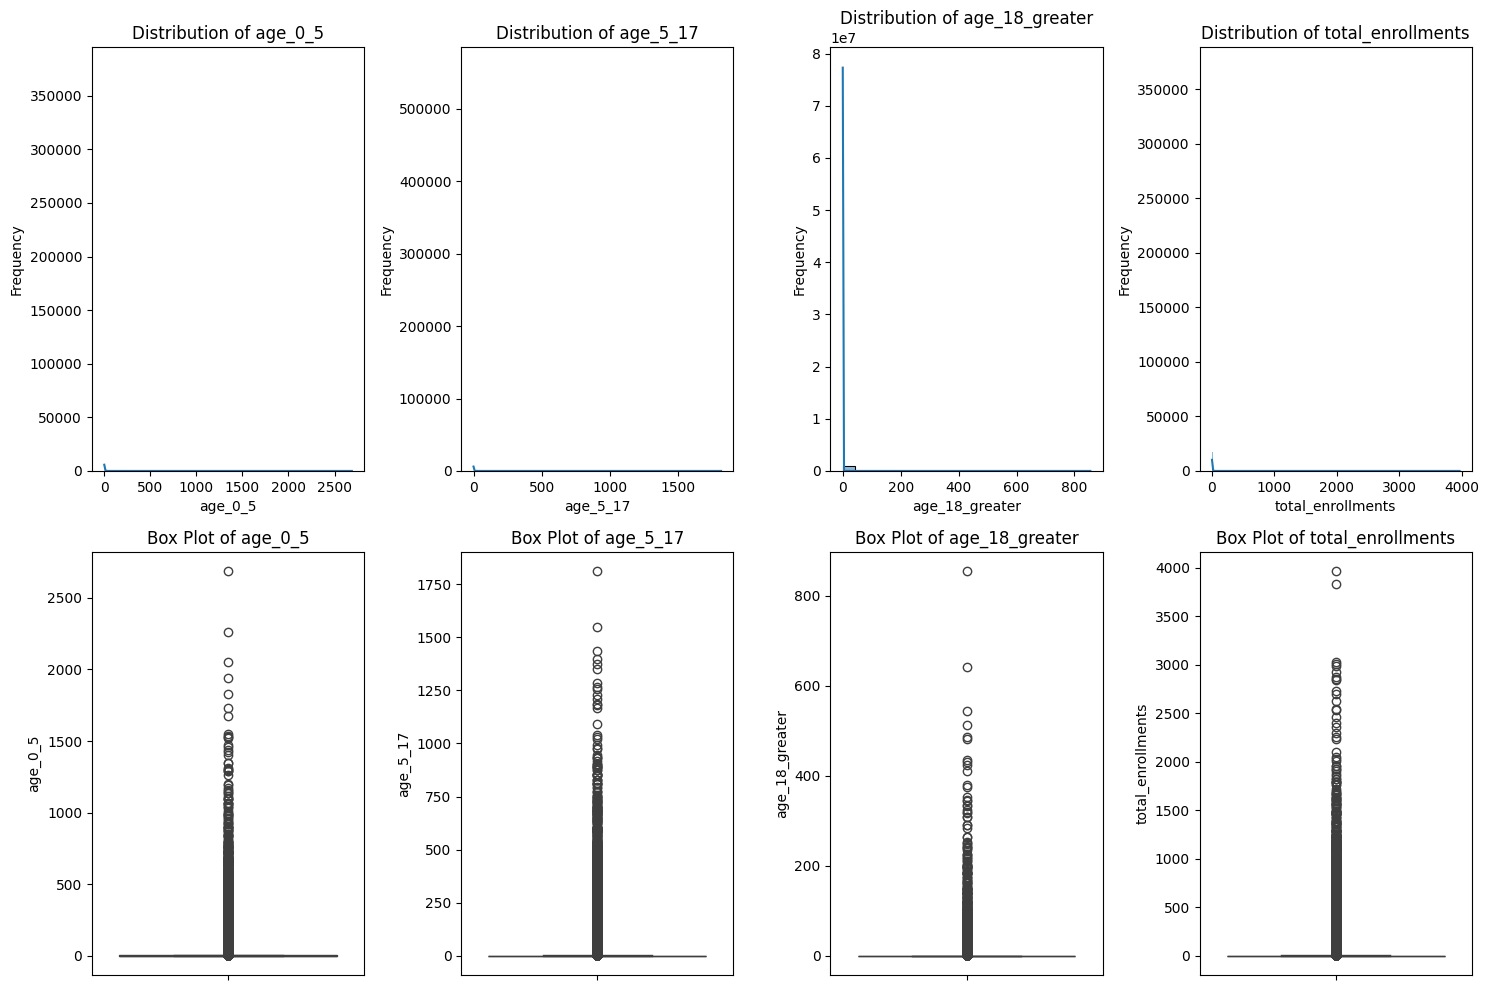

Histograms and box plots for numerical columns generated.


In [ ]:
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1) # Histogram
    sns.histplot(df_aadhar[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(2, 4, i + 1 + len(numerical_cols)) # Box Plot
    sns.boxplot(y=df_aadhar[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("Histograms and box plots for numerical columns generated.")

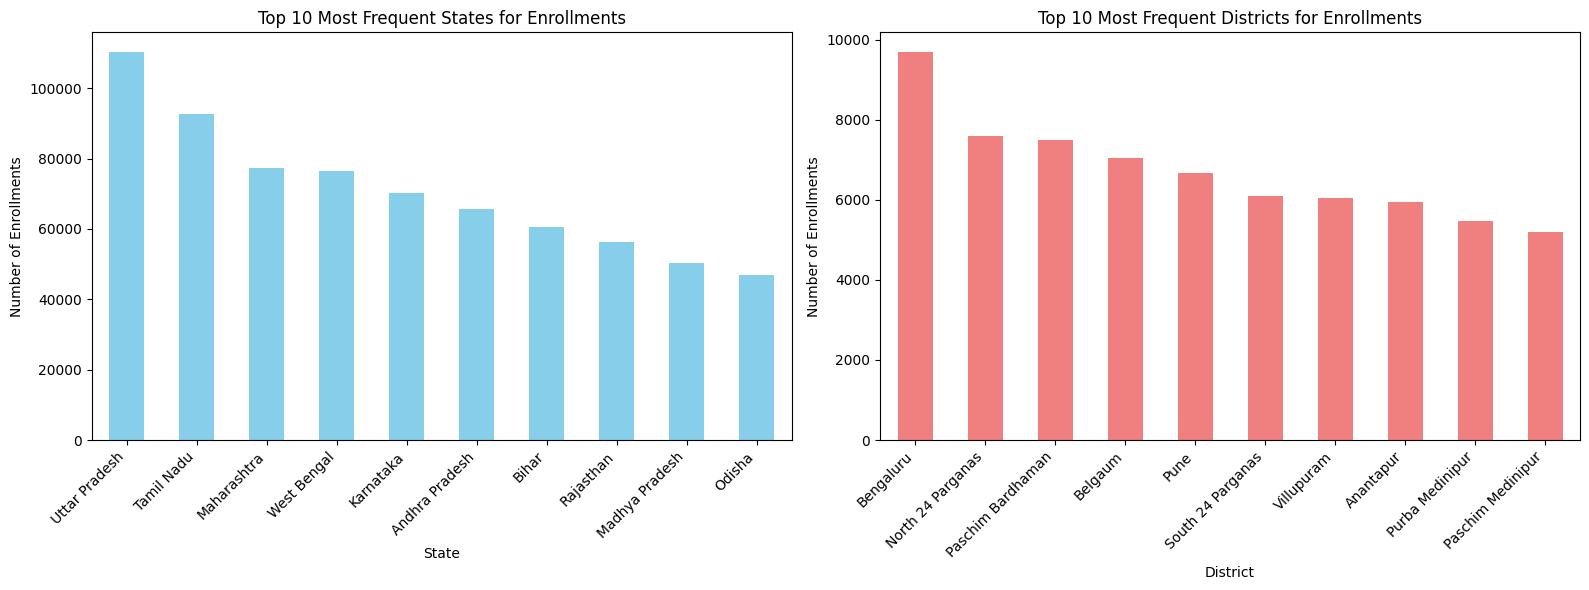

Bar plots for top 10 frequent states and districts generated.


In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
df_aadhar['state'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent States for Enrollments')
plt.xlabel('State')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
df_aadhar['district'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Frequent Districts for Enrollments')
plt.xlabel('District')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Bar plots for top 10 frequent states and districts generated.")

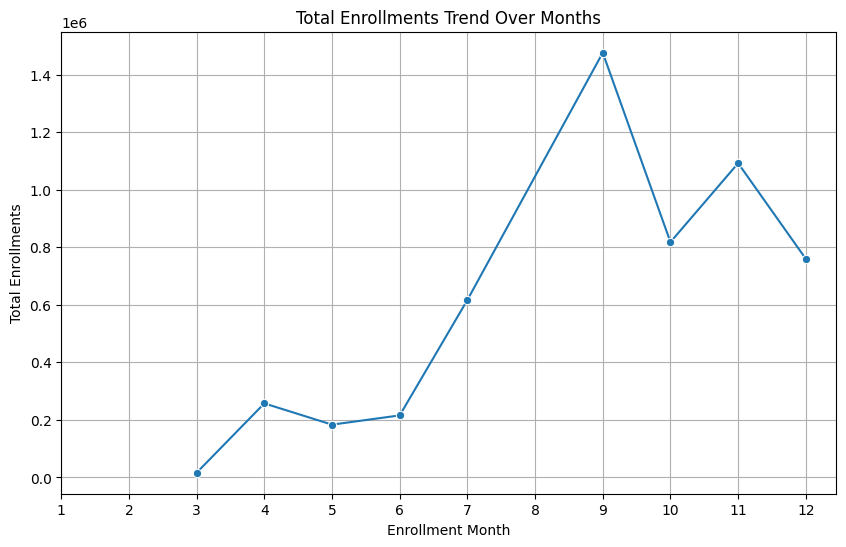

Line plot for total enrollments trend over months generated.


In [ ]:
monthly_enrollments = df_aadhar.groupby('enrollment_month')['total_enrollments'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='enrollment_month', y='total_enrollments', data=monthly_enrollments, marker='o')
plt.title('Total Enrollments Trend Over Months')
plt.xlabel('Enrollment Month')
plt.ylabel('Total Enrollments')
plt.xticks(range(1, 13)) # Ensure all months are shown if data exists for them
plt.grid(True)
plt.show()

print("Line plot for total enrollments trend over months generated.")

/tmp/ipython-input-3999792199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_enrollments_per_state.index, y=avg_enrollments_per_state.values, palette='viridis')


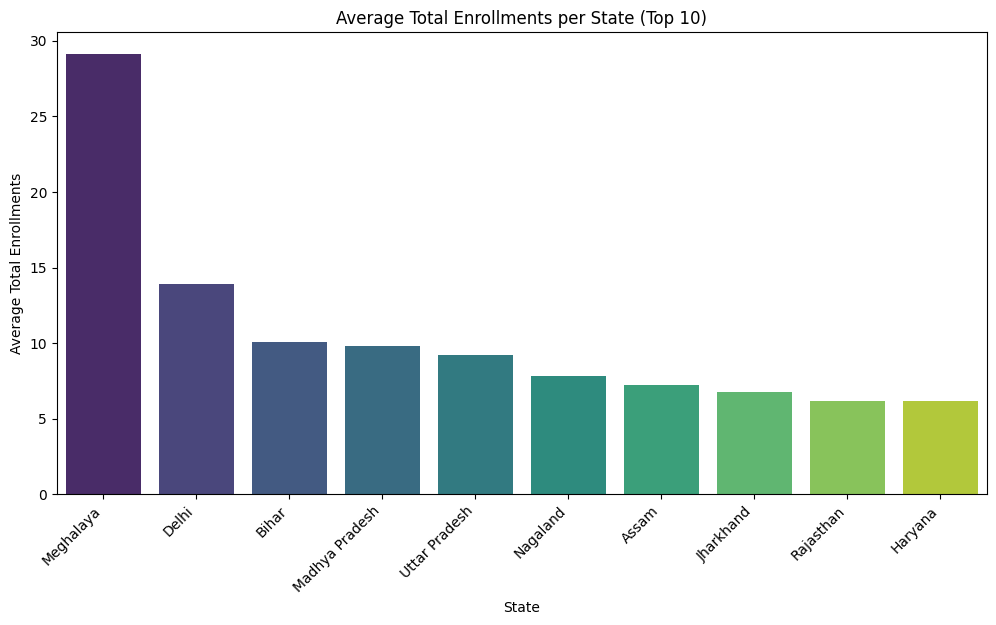

Bar plot for average total enrollments per state generated.


In [ ]:
avg_enrollments_per_state = df_aadhar.groupby('state')['total_enrollments'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_enrollments_per_state.index, y=avg_enrollments_per_state.values, palette='viridis')
plt.title('Average Total Enrollments per State (Top 10)')
plt.xlabel('State')
plt.ylabel('Average Total Enrollments')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Bar plot for average total enrollments per state generated.")

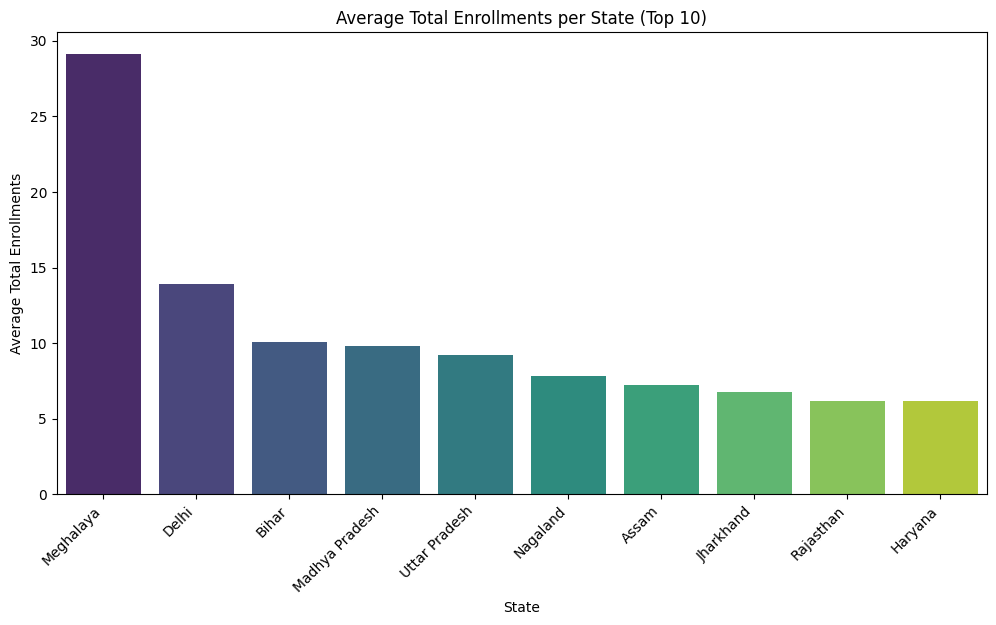

Bar plot for average total enrollments per state generated.


In [ ]:
avg_enrollments_per_state = df_aadhar.groupby('state')['total_enrollments'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_enrollments_per_state.index, y=avg_enrollments_per_state.values, hue=avg_enrollments_per_state.index, palette='viridis', legend=False)
plt.title('Average Total Enrollments per State (Top 10)')
plt.xlabel('State')
plt.ylabel('Average Total Enrollments')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Bar plot for average total enrollments per state generated.")

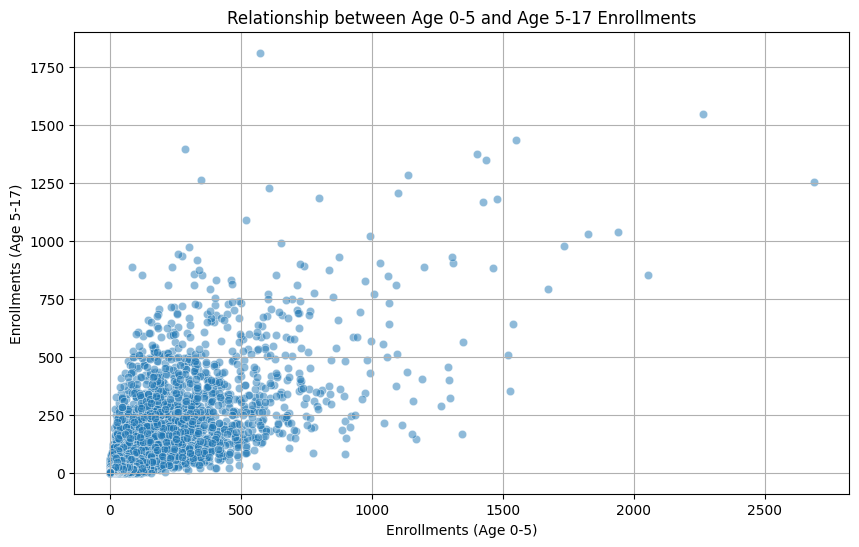

Scatter plot for age group relationship generated.


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_0_5', y='age_5_17', data=df_aadhar, alpha=0.5)
plt.title('Relationship between Age 0-5 and Age 5-17 Enrollments')
plt.xlabel('Enrollments (Age 0-5)')
plt.ylabel('Enrollments (Age 5-17)')
plt.grid(True)
plt.show()

print("Scatter plot for age group relationship generated.")

### 1. Using `google.colab.files.upload()` (Programmatic)

This method allows you to programmatically upload files from your local machine to the Colab environment. It will prompt you to select files from a dialog box.

In [ ]:
import pandas as pd

df1 = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape
df.head()
df.tail()



,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0
1006028,31-12-2025,West Bengal,West Midnapore,721517,2,1,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [ ]:
df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)



In [ ]:
monthly_enrolments = (
    df.groupby('month')['total_enrolment']
    .sum()
    .reset_index()
)

monthly_enrolments


,month,total_enrolment
0,3,16582
1,4,257438
2,5,183616
3,6,215734
4,7,616868
5,9,1475879
6,10,817920
7,11,1092007
8,12,759658


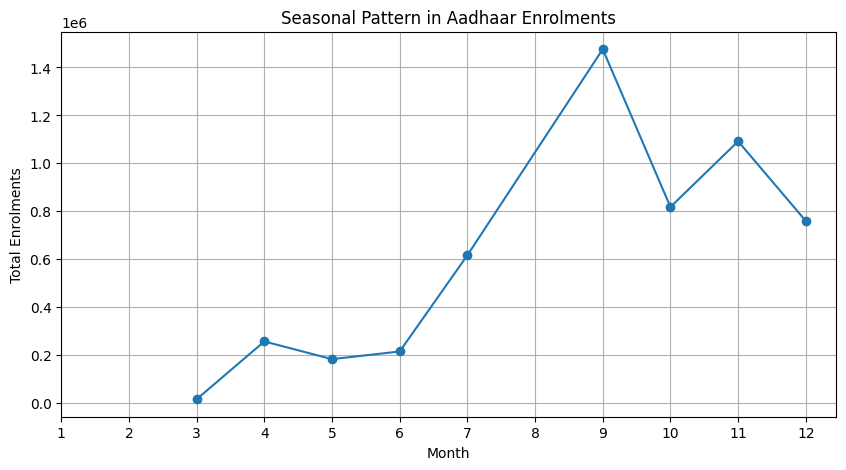

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    monthly_enrolments['month'],
    monthly_enrolments['total_enrolment'],
    marker='o'
)
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.title("Seasonal Pattern in Aadhaar Enrolments")
plt.grid(True)
plt.show()



In [ ]:
age_monthly = (
    df.groupby('month')[['age_0_5','age_5_17','age_18_greater']]
    .sum()
    .reset_index()
)

age_monthly


,month,age_0_5,age_5_17,age_18_greater
0,3,5367,7407,3808
1,4,141154,91371,24913
2,5,95342,71690,16584
3,6,98943,99911,16880
4,7,318352,263333,35183
5,9,995612,465401,14866
6,10,562856,238958,16106
7,11,769156,297658,25193
8,12,560183,184655,14820


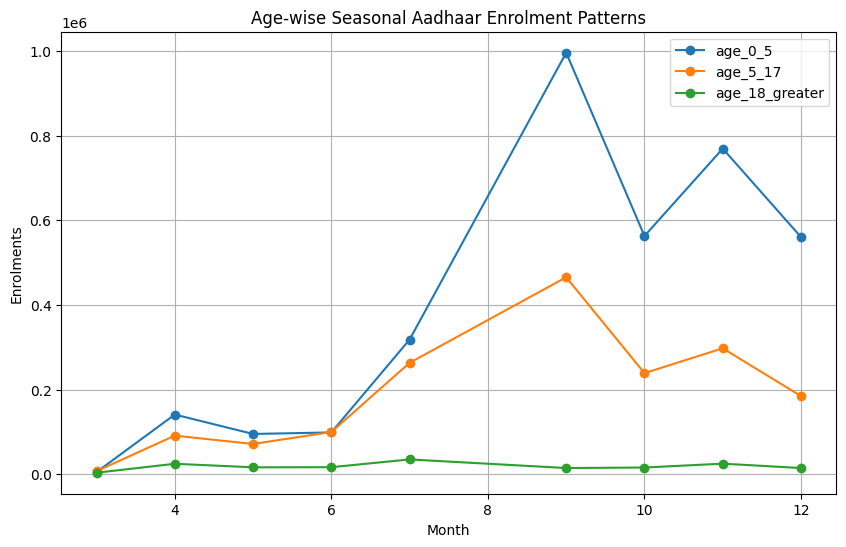

In [ ]:
age_monthly.set_index('month').plot(
    figsize=(10,6),
    marker='o'
)
plt.xlabel("Month")
plt.ylabel("Enrolments")
plt.title("Age-wise Seasonal Aadhaar Enrolment Patterns")
plt.grid(True)
plt.show()


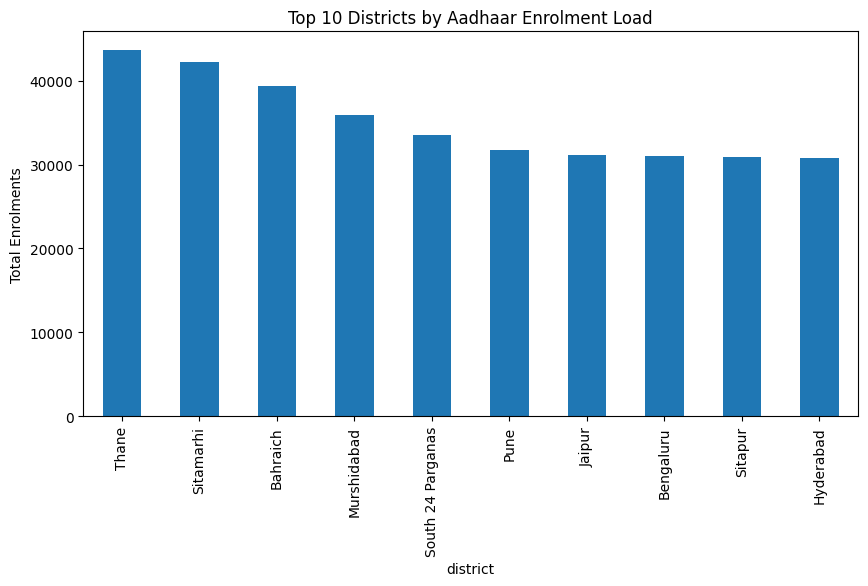

In [ ]:
district_enrolment = (
    df.groupby('district')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

district_enrolment


district_enrolment.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Districts by Aadhaar Enrolment Load")
plt.ylabel("Total Enrolments")
plt.show()


In [ ]:
district_pressure = (
    df.groupby('district')['total_enrolment']
    .sum()
    .reset_index()
    .sort_values(by='total_enrolment', ascending=False)
)

district_pressure.head(10)


,district,total_enrolment
882,Thane,43688
828,Sitamarhi,42232
63,Bahraich,39338
596,Murshidabad,35911
841,South 24 Parganas,33540
709,Pune,31763
369,Jaipur,31146
111,Bengaluru,30980
829,Sitapur,30854
358,Hyderabad,30830


In [ ]:
district_month_pressure = (
    df.groupby(['district', 'month'])['total_enrolment']
    .sum()
    .reset_index()
)

district_month_pressure.head()


,district,month,total_enrolment
0,100000,9,12
1,100000,10,1
2,100000,11,11
3,100000,12,194
4,24 Paraganas North,6,1050


In [ ]:
monthly_stats = (
    df.groupby('month')['total_enrolment']
    .sum()
    .reset_index()
)

threshold = monthly_stats['total_enrolment'].mean()

monthly_stats['risk_level'] = monthly_stats['total_enrolment'].apply(
    lambda x: 'HIGH' if x > threshold else 'NORMAL'
)

monthly_stats


,month,total_enrolment,risk_level
0,3,16582,NORMAL
1,4,257438,NORMAL
2,5,183616,NORMAL
3,6,215734,NORMAL
4,7,616868,HIGH
5,9,1475879,HIGH
6,10,817920,HIGH
7,11,1092007,HIGH
8,12,759658,HIGH


In [ ]:
monthly_stats['forecast_next_month'] = (
    monthly_stats['total_enrolment']
    .rolling(window=3)
    .mean()
)

monthly_stats


,month,total_enrolment,risk_level,forecast_next_month
0,3,16582,NORMAL,NaN
1,4,257438,NORMAL,NaN
2,5,183616,NORMAL,1.525453e+05
3,6,215734,NORMAL,2.189293e+05
4,7,616868,HIGH,3.387393e+05
5,9,1475879,HIGH,7.694937e+05
6,10,817920,HIGH,9.702223e+05
7,11,1092007,HIGH,1.128602e+06
8,12,759658,HIGH,8.898617e+05


In [ ]:
age_pressure = (
    df.groupby('month')[['age_0_5','age_5_17','age_18_greater']]
    .sum()
    .reset_index()
)

age_pressure


,month,age_0_5,age_5_17,age_18_greater
0,3,5367,7407,3808
1,4,141154,91371,24913
2,5,95342,71690,16584
3,6,98943,99911,16880
4,7,318352,263333,35183
5,9,995612,465401,14866
6,10,562856,238958,16106
7,11,769156,297658,25193
8,12,560183,184655,14820


In [ ]:
monthly_stats = (
    df.groupby('month')['total_enrolment']
    .sum()
    .reset_index()
)

monthly_stats


,month,total_enrolment
0,3,16582
1,4,257438
2,5,183616
3,6,215734
4,7,616868
5,9,1475879
6,10,817920
7,11,1092007
8,12,759658


In [ ]:
mean_enrol = monthly_stats['total_enrolment'].mean()
std_enrol = monthly_stats['total_enrolment'].std()

upper_threshold = mean_enrol + 2 * std_enrol
lower_threshold = mean_enrol - 2 * std_enrol

upper_threshold, lower_threshold


(np.float64(1568621.9822748331), np.float64(-360688.20449705527))

In [ ]:
monthly_stats['anomaly'] = monthly_stats['total_enrolment'].apply(
    lambda x: 'ANOMALY' if (x > upper_threshold or x < lower_threshold) else 'NORMAL'
)

monthly_stats


,month,total_enrolment,anomaly
0,3,16582,NORMAL
1,4,257438,NORMAL
2,5,183616,NORMAL
3,6,215734,NORMAL
4,7,616868,NORMAL
5,9,1475879,NORMAL
6,10,817920,NORMAL
7,11,1092007,NORMAL
8,12,759658,NORMAL


In [ ]:
district_month = (
    df.groupby(['district','month'])['total_enrolment']
    .sum()
    .reset_index()
)
district_stats = (
    district_month
    .groupby('district')['total_enrolment']
    .agg(['mean','std'])
    .reset_index()
)

district_month = district_month.merge(district_stats, on='district')

district_month['anomaly'] = district_month.apply(
    lambda row: 'ANOMALY'
    if row['total_enrolment'] > row['mean'] + 2 * row['std']
    else 'NORMAL',
    axis=1
)

district_month.head()


,district,month,total_enrolment,mean,std,anomaly
0,100000,9,12,54.5,93.132522,NORMAL
1,100000,10,1,54.5,93.132522,NORMAL
2,100000,11,11,54.5,93.132522,NORMAL
3,100000,12,194,54.5,93.132522,NORMAL
4,24 Paraganas North,6,1050,3073.5,2861.661143,NORMAL


In [ ]:
anomaly_cases = district_month[district_month['anomaly'] == 'ANOMALY']

anomaly_cases.sort_values(by='total_enrolment', ascending=False).head(10)


,district,month,total_enrolment,mean,std,anomaly
300,Bahraich,7,10547,4370.888889,2960.272726,ANOMALY
362,Banas Kantha,7,9228,1928.285714,3430.510055,ANOMALY
1247,Dohad,7,8001,1857.571429,2914.361157,ANOMALY
3907,Shahjahanpur,7,7925,3036.375000,2112.884145,ANOMALY
113,Alwar,9,7587,2922.875000,2258.440767,ANOMALY
479,Barwani,7,7219,2727.875000,2044.085785,ANOMALY
76,Aligarh,7,6408,2910.222222,1646.294686,ANOMALY
3014,Nagaur,9,6227,2466.714286,1870.229016,ANOMALY
3632,Rampur,7,6154,2513.750000,1586.990661,ANOMALY
2898,Morena,7,6073,2797.625000,1591.550362,ANOMALY


In [ ]:
monthly_load = (
    df.groupby('month')['total_enrolment']
    .sum()
    .reset_index()
)

avg_load = monthly_load['total_enrolment'].mean()

monthly_load['load_status'] = monthly_load['total_enrolment'].apply(
    lambda x: 'HIGH LOAD' if x > avg_load else 'NORMAL'
)

monthly_load


,month,total_enrolment,load_status
0,3,16582,NORMAL
1,4,257438,NORMAL
2,5,183616,NORMAL
3,6,215734,NORMAL
4,7,616868,HIGH LOAD
5,9,1475879,HIGH LOAD
6,10,817920,HIGH LOAD
7,11,1092007,HIGH LOAD
8,12,759658,HIGH LOAD


In [ ]:
top_pressure_districts = (
    df.groupby('district')['total_enrolment']
    .sum()
    .reset_index()
    .sort_values(by='total_enrolment', ascending=False)
    .head(10)
)

top_pressure_districts


,district,total_enrolment
882,Thane,43688
828,Sitamarhi,42232
63,Bahraich,39338
596,Murshidabad,35911
841,South 24 Parganas,33540
709,Pune,31763
369,Jaipur,31146
111,Bengaluru,30980
829,Sitapur,30854
358,Hyderabad,30830


In [ ]:
monthly_load['forecast_next_month'] = (
    monthly_load['total_enrolment']
    .rolling(3)
    .mean()
)

monthly_load


,month,total_enrolment,load_status,forecast_next_month
0,3,16582,NORMAL,NaN
1,4,257438,NORMAL,NaN
2,5,183616,NORMAL,1.525453e+05
3,6,215734,NORMAL,2.189293e+05
4,7,616868,HIGH LOAD,3.387393e+05
5,9,1475879,HIGH LOAD,7.694937e+05
6,10,817920,HIGH LOAD,9.702223e+05
7,11,1092007,HIGH LOAD,1.128602e+06
8,12,759658,HIGH LOAD,8.898617e+05


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10,6)


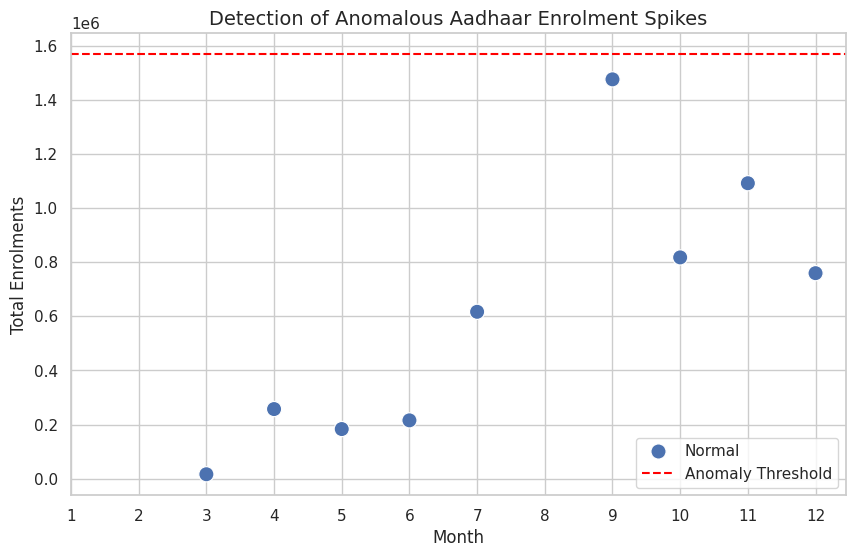

In [ ]:
monthly_stats = monthly_enrolments.copy()

mean_val = monthly_stats['total_enrolment'].mean()
std_val = monthly_stats['total_enrolment'].std()

monthly_stats['status'] = monthly_stats['total_enrolment'].apply(
    lambda x: 'Anomaly' if x > mean_val + 2*std_val else 'Normal'
)

sns.scatterplot(
    data=monthly_stats,
    x='month',
    y='total_enrolment',
    hue='status',
    s=120
)

plt.axhline(mean_val + 2*std_val, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Detection of Anomalous Aadhaar Enrolment Spikes", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.xticks(range(1,13))
plt.legend()
plt.show()


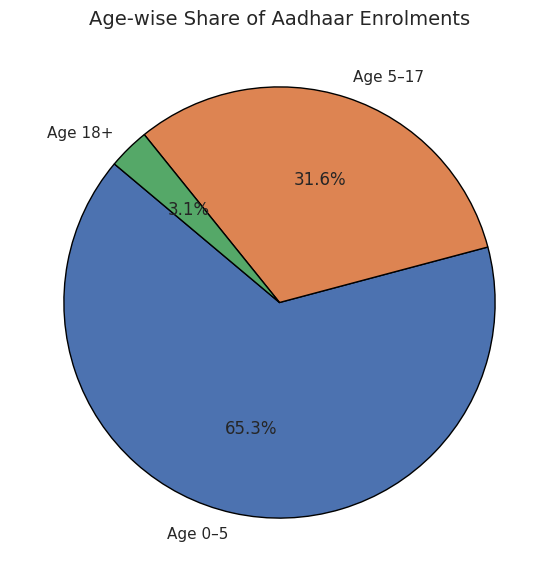

In [ ]:
age_totals = df[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure(figsize=(7,7))
plt.pie(
    age_totals,
    labels=['Age 0–5','Age 5–17','Age 18+'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Age-wise Share of Aadhaar Enrolments", fontsize=14)
plt.show()


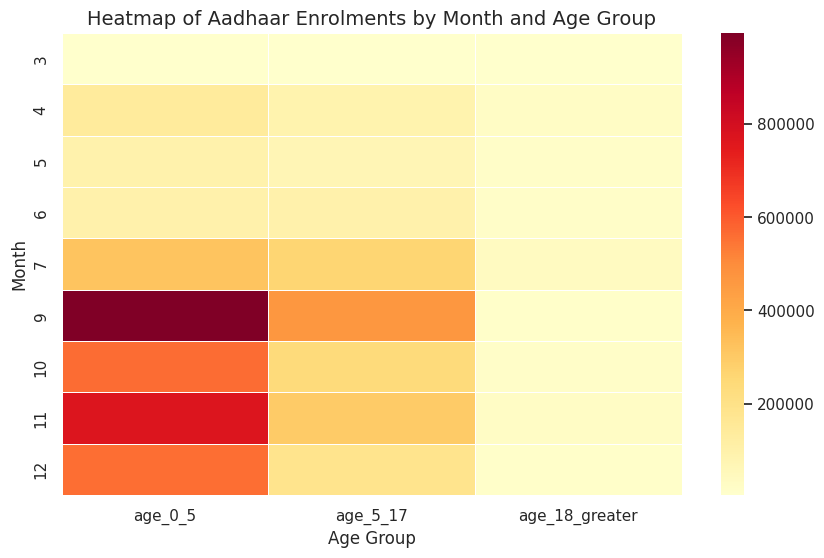

In [ ]:
age_month_heatmap = (
    df.groupby('month')[['age_0_5','age_5_17','age_18_greater']]
    .sum()
)

sns.heatmap(
    age_month_heatmap,
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Heatmap of Aadhaar Enrolments by Month and Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Month")
plt.show()


In [ ]:
monthly_total = (
    df.groupby('month')['total_enrolment']
    .sum()
)

threshold = monthly_total.mean()

peak_months = monthly_total[monthly_total > threshold]
non_peak_months = monthly_total[monthly_total <= threshold]

peak = peak_months.sum()
non_peak = non_peak_months.sum()

peak_months, non_peak_months


(month
 7      616868
 9     1475879
 10     817920
 11    1092007
 12     759658
 Name: total_enrolment, dtype: int64,
 month
 3     16582
 4    257438
 5    183616
 6    215734
 Name: total_enrolment, dtype: int64)

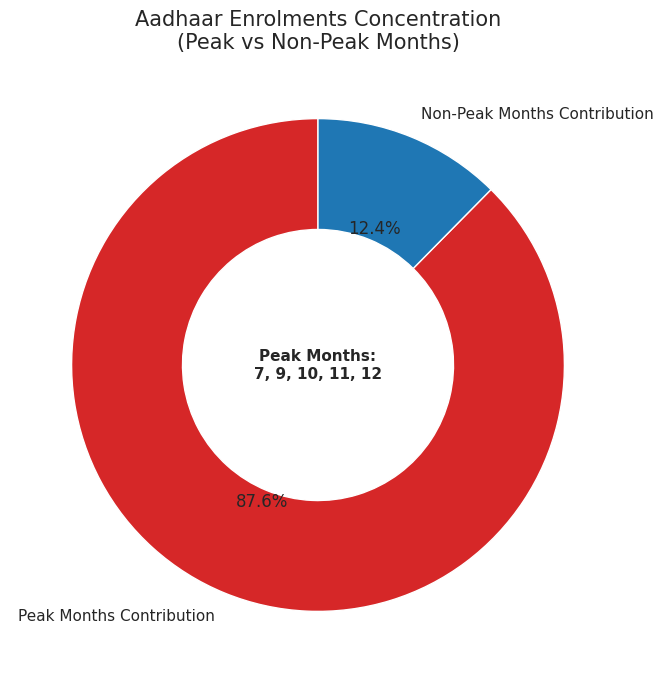

In [ ]:
plt.figure(figsize=(8,8))

plt.pie(
    [peak, non_peak],
    labels=['Peak Months Contribution','Non-Peak Months Contribution'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#d62728', '#1f77b4'],
    wedgeprops=dict(width=0.45, edgecolor='white')
)

plt.text(
    0, 0,
    f"Peak Months:\n{', '.join(map(str, peak_months.index.tolist()))}",
    ha='center',
    va='center',
    fontsize=11,
    weight='bold'
)

plt.title(
    "Aadhaar Enrolments Concentration\n(Peak vs Non-Peak Months)",
    fontsize=15
)

plt.show()


In [ ]:
monthly_total['season'] = monthly_total['total_enrolment'].apply(
    lambda x: 'Peak Demand' if x > monthly_total['total_enrolment'].mean() else 'Normal Demand'
)




In [ ]:
import plotly.express as px

fig = px.line_polar(
    monthly_total,
    r='total_enrolment',
    theta='month',
    color='season',
    line_close=True,
    markers=True,
    title="Seasonal Aadhaar Enrolment Intensity (Peak vs Normal)",
    color_discrete_map={
        'Peak Demand': '#e63946',
        'Normal Demand': '#457b9d'
    }
)

fig.update_traces(
    line=dict(width=4),
    marker=dict(size=10)
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, monthly_total['total_enrolment'].max() * 1.35],
            tickfont=dict(size=12)
        ),
        angularaxis=dict(
            tickmode='array',
            tickvals=list(range(1,13)),
            ticktext=['Jan','Feb','Mar','Apr','May','Jun',
                      'Jul','Aug','Sep','Oct','Nov','Dec'],
            rotation=90,
            tickfont=dict(size=14)
        )
    ),
    legend_title_text="Demand Level",
    margin=dict(l=90, r=90, t=100, b=90)
)

fig.show()


In [ ]:
calendar_df = (
    df.groupby(['year','month'])['total_enrolment']
    .sum()
    .reset_index()
)

fig = px.imshow(
    calendar_df.pivot(
        index='year',
        columns='month',
        values='total_enrolment'
    ),
    aspect='auto',
    color_continuous_scale='YlOrRd',
    title="Calendar Heatmap of Aadhaar Enrolment Intensity"
)

fig.show()

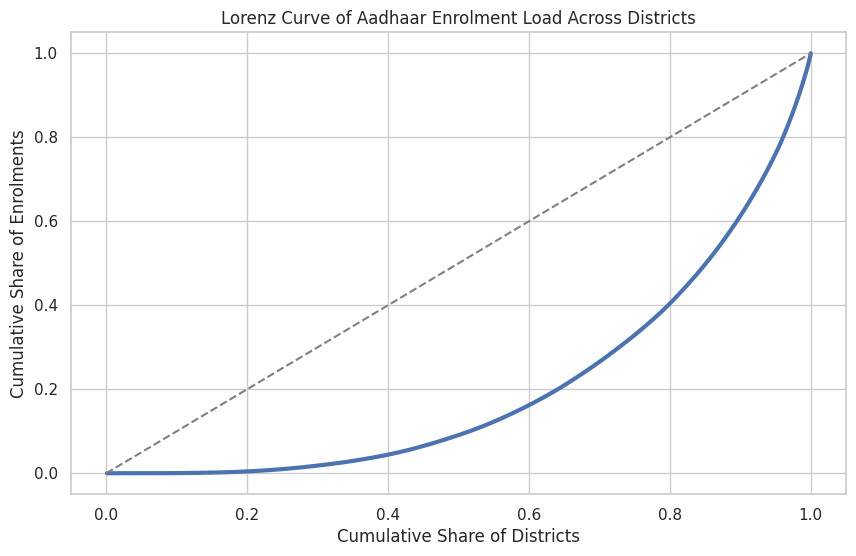

In [ ]:
district_totals = (
    df.groupby('district')['total_enrolment']
    .sum()
    .sort_values()
)

cum_enrol = district_totals.cumsum() / district_totals.sum()
cum_dist = np.arange(1, len(district_totals)+1) / len(district_totals)

plt.plot(cum_dist, cum_enrol, linewidth=3)
plt.plot([0,1], [0,1], '--', color='gray')

plt.title("Lorenz Curve of Aadhaar Enrolment Load Across Districts")
plt.xlabel("Cumulative Share of Districts")
plt.ylabel("Cumulative Share of Enrolments")
plt.show()


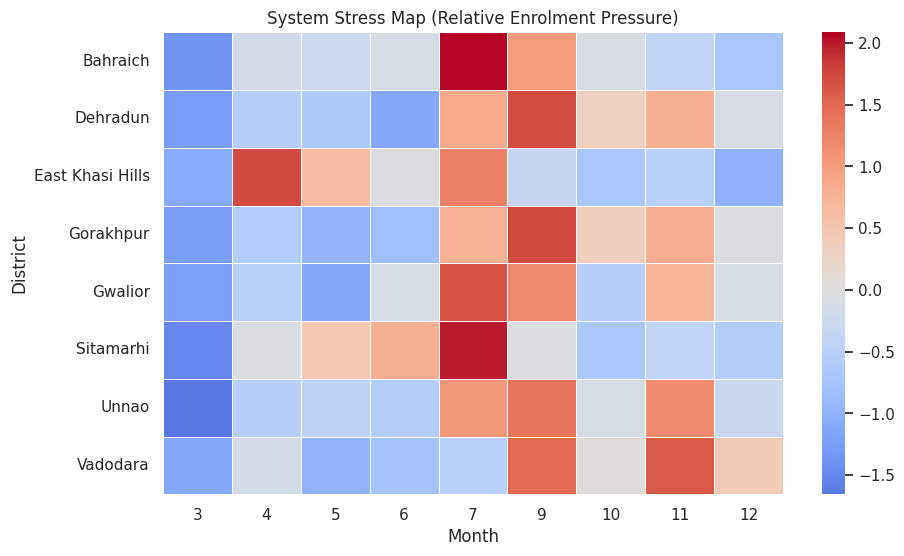

In [ ]:
district_month = (
    df.groupby(['district','month'])['total_enrolment']
    .sum()
    .reset_index()
)

district_month['z_score'] = district_month.groupby('district')['total_enrolment'] \
    .transform(lambda x: (x - x.mean()) / x.std())

top_districts = district_month['district'].value_counts().head(8).index

stress_matrix = district_month[
    district_month['district'].isin(top_districts)
].pivot(
    index='district',
    columns='month',
    values='z_score'
)

sns.heatmap(
    stress_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.4
)

plt.title("System Stress Map (Relative Enrolment Pressure)")
plt.xlabel("Month")
plt.ylabel("District")
plt.show()


## Final Task

### Subtask:
Provide a comprehensive summary of the detailed methodology, data cleaning, preprocessing, and transformations applied, along with key insights and observations gained from the exploratory data analysis of the Aadhar enrolment dataset. Highlight any interesting patterns, anomalies, or potential areas for further investigation identified during the EDA.


## Summary:

### Data Analysis Key Findings

*   **Data Overview:** The analysis began with a dataset comprising 1,006,029 Aadhar enrollment records across 7 columns.
*   **Initial Data Quality:**
    *   No missing values were detected in the initial combined dataset.
    *   Initial data types were `object` for `date`, `state`, `district`, and `int64` for `pincode` and age-group columns.
*   **Date Column Standardization:** The `date` column was successfully converted from `object` to `datetime64[ns]` format, enabling time-series analysis.
*   **Geographical Data Cleaning:**
    *   The `state` column, initially having 55 unique values, was cleaned by standardizing casing, removing extra spaces, correcting misspellings (e.g., "Orissa" to "Odisha", "Jammu And Kashmir" to "Jammu and Kashmir"), and converting an erroneous "100000" entry to a missing value. This significantly improved consistency.
    *   The `district` column, with 985 unique values, underwent extensive cleaning, including standardizing casing, removing special characters (\*, ?, \xa0, \u2013, \u2212), and applying a large mapping dictionary to unify district names (e.g., "Bengaluru Urban" to "Bengaluru", "Ahmedabad" to "Ahmadabad"). An erroneous "100000" entry was also handled. This process streamlined granular geographical data.
*   **Feature Engineering:**
    *   New temporal features: `enrollment_year`, `enrollment_month`, and `enrollment_day` were extracted from the `date` column.
    *   A `total_enrollments` column was created by summing the enrollments across all age groups (`age_0_5`, `age_5_17`, `age_18_greater`), providing a consolidated metric.
*   **Descriptive Statistics & Distributions:**
    *   Numerical features exhibited a wide range, with `enrollment_year` being consistently `2025`. Maximum values for age-related enrollment counts were notably high, suggesting potential outliers or specific high-volume enrollment events.
    *   **Top Enrollment States:** Uttar Pradesh, Tamil Nadu, and Maharashtra were identified as the states with the highest frequency of enrollments.
    *   **Top Enrollment Districts:** Bengaluru, North 24 Parganas, and Paschim Bardhaman recorded the highest enrollment frequencies.
*   **Enrollment Trends:** Visualizations, including histograms, box plots, bar plots, and line plots, helped illustrate distributions of numerical variables, frequencies of categorical variables, and monthly enrollment trends. A scatter plot was used to explore the relationship between different age group enrollments.

### Insights or Next Steps

*   **Investigate Outliers:** The presence of extremely high maximum values in age-related enrollment counts (`age_0_5`, `age_5_17`, `age_18_greater`) warrants further investigation to determine if these represent genuine high-volume events or data entry anomalies.
*   **Granular Time-Series Analysis:** With the `date` column converted to `datetime` objects and new temporal features engineered, more detailed time-series analysis could be performed to uncover daily or weekly enrollment patterns, particularly exploring any specific periods of high activity.
